In [1]:
import math
from typing import Tuple, Optional, List, Iterator
from pathlib import Path
from IPython.display import clear_output

import torchvision
import numpy as np
import torch
import torch.nn.functional as F
import torch.utils.data as data
from torch import nn

import matplotlib.pyplot as plt

from tqdm import tqdm

from PIL import Image

In [11]:
class Dataset(data.Dataset):
    def __init__(self, path: str, image_size: int):
        super().__init__()
        self.paths = [p for p in Path(path).glob(f'**\\*.jpg')] + [p for p in Path(path).glob(f'**\\*.png')]
        self.transform = torchvision.transforms.Compose([
            torchvision.transforms.Resize(image_size),
            torchvision.transforms.RandomCrop(image_size),
            torchvision.transforms.RandomHorizontalFlip(),
            torchvision.transforms.ColorJitter(.15,.2,.2),
            torchvision.transforms.ToTensor(),
        ])
    
    def __len__(self):
        return len(self.paths)
    
    def __getitem__(self, index):
        path = self.paths[index]
        img = Image.open(path).convert("RGB")
        return self.transform(img)

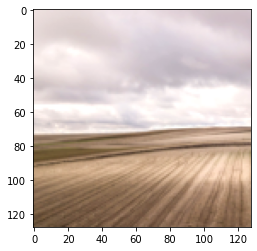

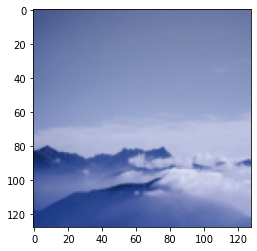

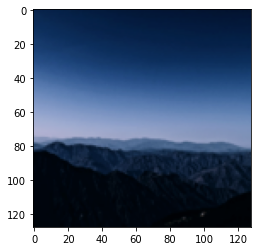

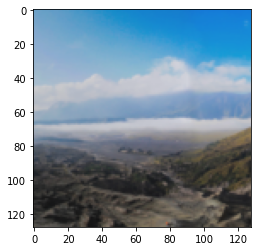

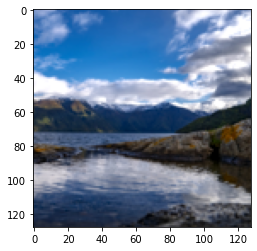

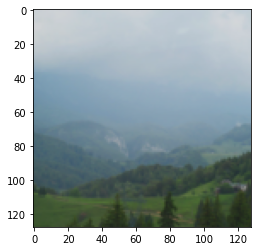

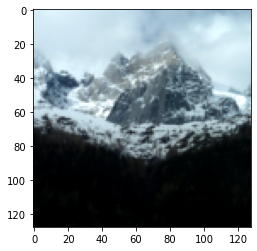

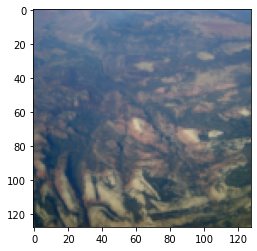

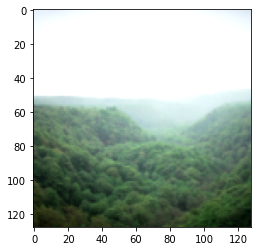

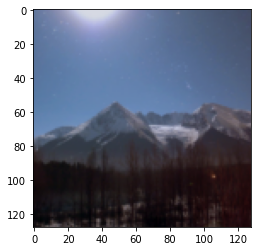

In [13]:
_dataset = Dataset("E:\\projects\\StyleGan2Pytorch\\dataset", 128)

for i in range(10):
    batch = torchvision.transforms.ToPILImage()(_dataset[np.random.randint(0, 16700)])
    plt.imshow(batch)
    plt.show()